In [ ]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input 
import tensorflow as tf

import time

#add other imports here (if any, for example, pytorch)

## Data set 

### Source
The dataset (CAN-intrusion-dataset-10000.csv) has been constructed by logging CAN traffic via the OBD-II port from a real vehicle while message injection attacks were performing. The classification goal is to distinguish cyber-attacks and normal samples by classifying the data samples. The dataset includes over 10,000 records and 10 attributes (including the target variable "Label").

### Variables
The definitions of the attributes are as followss.

* CAN ID : identifier of CAN message.
* DATA[0~7] : data value (byte), ranging from 0 to 255. They have been converted from hexadecimal numbers to decimal numbers.  
* Label : 0 indicates 'Normal', and 1 indicates an attack (including DoS, Fuzzy, Gear, or RPM).

A) Load the Data set CAN-intrusion-dataset-10000.csv 

B) Split the data into equals-sized training and test sets (use a random_state = 1, and do not shuffle the data).  

C) How many observations do you have in your training set?  

D) How many observations for each class in your training set?

E) Z-standarize the input features of the training and test sets.

In [ ]:
### Q1A)
intrusion_dataset = pd.read_csv("CAN-intrusion-dataset-10000.csv")
CAN_Intrusion = pd.DataFrame(intrusion_dataset)
CAN_Intrusion

,CAN_ID,DATA_0,DATA_1,DATA_2,DATA_3,DATA_4,DATA_5,DATA_6,DATA_7,Label
0,305,0,128,0,0,85,127,4,167,0
1,339,0,33,16,255,0,255,0,0,0
2,704,20,0,0,0,0,0,0,0,0
3,339,0,33,16,255,0,255,0,0,0
4,1072,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,790,69,41,36,255,41,36,0,255,1
9996,399,254,75,0,0,0,60,0,0,0
9997,399,254,81,0,0,0,60,0,0,0
9998,608,25,34,34,48,8,142,112,38,0


In [ ]:
### Q1B)
X = CAN_Intrusion.drop(['Label'], axis=1)
y = CAN_Intrusion.loc[:, ['Label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, shuffle=False)

In [ ]:
### Q1C) 
print("There are ", X_train.shape[0], " observation in input training set.")
print("There are ", y_train.shape[0], " observation in target training set.")

There are  5000  observation in input training set.
There are  5000  observation in target training set.


In [ ]:
### Q1D)
print("Below are number of observations in each class")
print(y_train.value_counts())

Below are number of observations in each class
Label
0        4284
1         716
dtype: int64


In [ ]:
### Q1E)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

A) Build a L1-regularized logistic regression model to all the training data, and then get the predicted labels for each item of the test set.

B) Print out the precision, recall, and F1-score of the test set.

C) Print out the model execution time (including both training and testing time) in milliseconds. Please keep two decimal places.

In [ ]:
### Q2A) 
l1_logistic_clf = LogisticRegression(penalty='l1', solver='saga')

start_time_fit_q2 = time.time()
l1_logistic_clf.fit(X_train_scaled, y_train)
elapsed_time_fit_q2 = time.time() - start_time_fit_q2

start_time_predict_q2 = time.time()
y_pred_q2 = l1_logistic_clf.predict(X_test_scaled)
elapsed_time_predict_q2 = time.time() - start_time_predict_q2

In [ ]:
### Q2B)
precision = precision_score(y_test, y_pred_q2)
print("Precision score for Logistic Regression is: ", precision)

recall = recall_score(y_test, y_pred_q2)
print("Recall score for Logistic Regression is: ", recall)

f1 = 2 * (precision * recall) / (precision + recall)
print("F1 score for Logistic Regression is: ", f1)

Precision score for Logistic Regression is:  0.98
Recall score for Logistic Regression is:  0.5568181818181818
F1 score for Logistic Regression is:  0.7101449275362319


In [ ]:
### Q2C) 
print(f"Elapsed time to train Logistic Regression: {elapsed_time_fit_q2*1000:.2f} miliseconds")
print(f"Elapsed time to test Logistic Regression: {elapsed_time_predict_q2*1000:.2f} miliseconds")

Elapsed time to train Logistic Regression: 63.18 miliseconds
Elapsed time to test Logistic Regression: 4.86 miliseconds


A) Implement a single-layer neural network model that is used to classify the CAN intrusion data samples into normal and anomalous classes (0: normal, 1: attack). Use the standarized training set from Q1E) to train the network.

The details of the model are as follows:
* Use a Sigmoid as the output layer acitivation function to enable non-linearity. 
* Use the binary cross-entropy loss as a training criterion.
* Use Stochastic gradient descent optimizer with a learning rate of 0.1.
* Run the model for 10 iterations/epochs.

B) Record the loss for each iteration, and make a plot of iterations/epochs vs loss(Binary Cross Entropy).

C) Print out the precision, recall, and F1-score of the test set.

D) Print out the model execution time (including both training and testing time) in milliseconds. Please keep two decimal places.

In [ ]:
### Q3A)

#Indicate the input dimension for a single layer neural network
input_size = X_train_scaled.shape[1]

#Indicate the output dimension for a single layer neural network
output_size = y_train.shape[1]

#Create a Sequential model
model_q3 = Sequential()

#Set the number of neurons in single layer neural network to be equal to the output size.
#This is because we are dealing with binary classification and we want the network to output a single value indicating the probability of the input belonging to one of the two classes.
#Also set the activation function to be equal to logistic sigmoid.
model_q3.add(Dense(output_size, input_dim = input_size, activation = 'sigmoid')) 

#Compile this single layer neural network with binary cross-entropy loss function.
#and SGD optimizer with learning rate equals to 0.1
model_q3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))


start_time_fit_q3 = time.time()
history_q3 = model_q3.fit(X_train_scaled, y_train, epochs=10, verbose=0)
elapsed_time_fit_q3 = time.time() - start_time_fit_q3

start_time_predict_q3 = time.time()
y_pred_q3 = model_q3.predict(X_test_scaled)
elapsed_time_predict_q3 = time.time() - start_time_predict_q3

157/157 [==============================] - 0s 755us/step


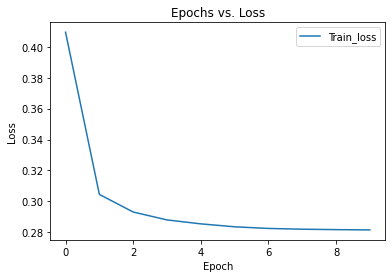

In [ ]:
### Q3B)
plt.plot(history_q3.history['loss'])  # plotting train loss

plt.title('Epochs vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_loss'], loc='upper right')
plt.show()

In [ ]:
### Q3C)
p_q3 = tf.keras.metrics.Precision()
p_q3.update_state(y_test, y_pred_q3)
precision_q3 = p_q3.result().numpy()
print("Precision score for Single layer neural network is: ", precision_q3)

r_q3 = tf.keras.metrics.Recall()
r_q3.update_state(y_test, y_pred_q3)
recall_q3 = r_q3.result().numpy()
print("Recall score for Single layer neural network is: ", recall_q3)

f1_score_q3 = 2 * (precision_q3 * recall_q3) / (precision_q3 + recall_q3)
print("F1 score for Single layer neural network is: ", f1_score_q3)

Precision score for Single layer neural network is:  0.96790123
Recall score for Single layer neural network is:  0.5568182
F1 score for Single layer neural network is:  0.7069431819834352


In [ ]:
### Q3D)
print(f"Elapsed time to train Single layer neural network: {elapsed_time_fit_q3*1000:.2f} miliseconds")
print(f"Elapsed time to test Single layer neural network: {elapsed_time_predict_q3*1000:.2f} miliseconds")

Elapsed time to train Single layer neural network: 3192.31 miliseconds
Elapsed time to test Single layer neural network: 287.12 miliseconds


1) Implement a Multi-Layer Perceptron (MLP) model that is used to classify the CAN intrusion data samples into normal and anomalous classes (0: normal, 1: attack). Use the standarized training set from Q1E) to train the network. 
The details of the model are as follows:
* Each hidden layer have 8 neurons/units. 
* Use tanh function as the activation function for hidden layers.
* Use a Sigmoid as the output layer acitivation function to enable non-linearity.  
* Use Stochastic gradient descent optimizer with a learning rate of 0.1.
* Run the model for 10 iterations/epochs 

B) Record the loss for each iteration, and make a plot of iterations/epochs vs loss(Binary Cross Entropy).

C) Print out the precision, recall, and F1-score of the test set.

D) Print out the model execution time (including both training and testing time) in milliseconds. Please keep two decimal places.

In [ ]:
### Q4A)

#Create a Sequential model
model_q4 = Sequential()

#first hidden layer with 8 neurons and input dimensionality equals to number of features in X_train
model_q4.add(Dense(8, input_dim = input_size, activation = 'tanh'))

#second hidden layer with 8 neurons
model_q4.add(Dense(8, activation = 'tanh'))

#output layer with output dimensionality equals to number of columns in y_train
model_q4.add(Dense(output_size, activation = 'sigmoid'))

model_q4.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.1))

start_time_fit_q4 = time.time()
history_q4 = model_q4.fit(X_train_scaled, y_train, epochs=10, verbose=0)
elapsed_time_fit_q4 = time.time() - start_time_fit_q4

start_time_predict_q4 = time.time()
y_pred_q4 = model_q4.predict(X_test_scaled)
elapsed_time_predict_q4 = time.time() - start_time_predict_q4

157/157 [==============================] - 0s 924us/step


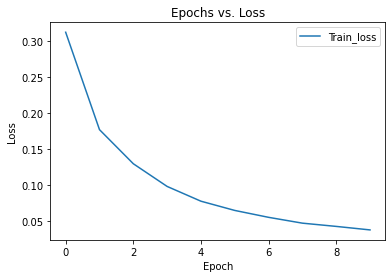

In [ ]:
### Q4B)
plt.plot(history_q4.history['loss'])  # plotting train loss

plt.title('Epochs vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_loss'], loc='upper right')
plt.show()

In [ ]:
### Q4C)
p_q4 = tf.keras.metrics.Precision()
p_q4.update_state(y_test, y_pred_q4)
precision_q4 = p_q4.result().numpy()
print("Precision score for MLP is: ", precision_q4)

r_q4 = tf.keras.metrics.Recall()
r_q4.update_state(y_test, y_pred_q4)
recall_q4 = r_q4.result().numpy()
print("Recall score for MLP is: ", recall_q4)

f1_score_q4 = 2 * (precision_q4 * recall_q4) / (precision_q4 + recall_q4)
print("F1 score for MLP is: ", f1_score_q4)

Precision score for MLP is:  0.96387285
Recall score for MLP is:  0.9474432
F1 score for MLP is:  0.9555873810232604


In [ ]:
### Q4D)
print(f"Elapsed time to train MLP with two hidden layers: {elapsed_time_fit_q4*1000:.2f} miliseconds")
print(f"Elapsed time to test MLP with two hidden layers: {elapsed_time_predict_q4*1000:.2f} miliseconds")

Elapsed time to train MLP with two hidden layers: 1855.32 miliseconds
Elapsed time to test MLP with two hidden layers: 388.06 miliseconds


A) Buil a Grid_Search_NN_model that has the same architecture as the MLP model from Question 4. Use grid search to tune two hyperparameters:
* The number of neurons on the hidden layers of your MLP model (find the best number among 8, 16, 32). Each hidden layer should have the same number of neurons/nodes, so only one hyperparameter is needed to tune the number of neurons.
* Learning rate of the SGD optimizer (find the best value among the two numbers 0.01 and 0.1). 

B) Implement grid search to identify optimal hyperparameter values, and print out the best hyperparameter values and the best cross-validation accuracy.

C) Build the optimized MLP model on the training set by passing the detected best hyperparameter values to the Grid_Search_NN_model. Print out the precision, recall, and F1-score of the optimized MLP model on the test set.

In [ ]:
### Q5A)
def Grid_Search_NN_model(hidden_neurons = 8, learning_rate = 0.1):
    #write function here

    myGSModel = Sequential()

    myGSModel.add(Dense(hidden_neurons, input_dim = input_size, activation = 'tanh'))
    myGSModel.add(Dense(hidden_neurons, activation = 'tanh'))
    myGSModel.add(Dense(output_size, activation = 'sigmoid'))

    myGSModel.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate))
    return myGSModel

In [ ]:
### Q5B)
# Run gridsearch here
param_space = {
    'hidden_neurons': [8, 16, 32],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(estimator = KerasClassifier(build_fn = Grid_Search_NN_model, epochs = 10, verbose = 0), 
                           param_grid = param_space, 
                           scoring = 'accuracy',
                           cv = 3)

grid_search_result = grid_search.fit(X_train_scaled, y_train)

print("The best combination of number of hidden neurons and learning rate is: ", grid_search_result.best_params_)
print("The best cross-validation accuracy is: ", grid_search_result.best_score_)

53/53 [==============================] - 0s 788us/step
The best combination of number of hidden neurons and learning rate is:  {'hidden_neurons': 16, 'learning_rate': 0.1}
The best cross-validation accuracy is:  0.9875994789037391


In [ ]:
### Q5C)
optimized_hn = grid_search_result.best_params_['hidden_neurons']
optimized_lr = grid_search_result.best_params_['learning_rate']

optimized_NN = Grid_Search_NN_model(optimized_hn, optimized_lr)
optimized_NN.fit(X_train_scaled, y_train, epochs=10, verbose=0)
y_pred_optimized = optimized_NN.predict(X_test_scaled)

p_q5 = tf.keras.metrics.Precision()
p_q5.update_state(y_test, y_pred_optimized)
precision_q5 = p_q5.result().numpy()
print("Precision score for Optimized NN model is: ", precision_q5)

r_q5 = tf.keras.metrics.Recall()
r_q5.update_state(y_test, y_pred_optimized)
recall_q5 = r_q5.result().numpy()
print("Recall score for Optimized NN model is: ", recall_q5)

f1_score_q5 = 2 * (precision_q5 * recall_q5) / (precision_q5 + recall_q5)
print("F1 score for Optimized NN model is: ", f1_score_q5)

157/157 [==============================] - 0s 878us/step
Precision score for Optimized NN model is:  0.94174755
Recall score for Optimized NN model is:  0.9644886
F1 score for Optimized NN model is:  0.9529824520151379
